## Project: Investment Portfolio Optimization using quantitative methods
## UGST4090: Introduction to Optimization
### By: Chorobek Sheranov
### Central European University
### 26.03.2024

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime
from scipy.optimize import minimize
import plotly.graph_objects as go

Below, we define assets that we would like to have in our portfolio. They span a variety of sectors and industries such as Equities, Fixed Income and Real Estate Funds across global markets with a goal of diversification.

However, since we would like to harness the efficiency of purely quantitative approaches to an investment portfolio selection, we aim to avoid any biases, and assets are selected mostly randomly across asset classes.

In [2]:
assets = {'SPY': 'SPDR S&P 500 ETF Trust (NASDAQ)', 'ISTB': 'IShares 1-5 Year USD Bond ETF', 'IYR': 'iShares U.S. Real Estate ETF', 
          'REM':'iShares Mortgage Real Estate ETF', 'GLD': 'SPDR Gold Shares', 'CL=F': 'West Texas Intermediate (WTI) Crude Oil', 
          'AAPL': 'Apple Inc.', 'MSFT': 'Microsoft Corporation', 'JNJ': 'Johnson & Johnson',
          'JPM': 'JPMorgan Chase & Co.', 'BA': 'Boeing Company', 'NKE': 'Nike Inc.', 'AMZN': 'Amazon.com Inc.',
          'DB1.DE': 'Deutsche Börse AG', 'IEMG': 'iShares Core MSCI Emerging Markets ETF', 'ILF': 'iShares Latin America 40 ETF'}

In [3]:
tickers = list(assets.keys())

In [4]:
#downloading price data for selected assets
df = pd.DataFrame()

# Loop through each ticker and download data
for ticker in tickers:
    df[ticker] = yf.download(ticker, start="2014-01-01", end="2024-01-01")['Adj Close']  # Adj Close price is used to adjust for splits and dividends, providing a more accurate reflection of the stock's value

# Calculate daily returns
df = df.pct_change().dropna()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [5]:
df.head() #the dataframe reflects the daily returns of the selected assets across 2014-2024

SPY      ISTB       IYR       REM       GLD      CL=F  \
Date                                                                     
2014-01-03 -0.000164 -0.000599  0.005875  0.006034  0.010932 -0.015507   
2014-01-06 -0.002898  0.002100  0.004104  0.005999  0.001760 -0.005641   
2014-01-07  0.006142  0.000399  0.003459  0.005111 -0.005690  0.002569   
2014-01-08  0.000218 -0.002294 -0.001567 -0.000848 -0.005891 -0.014306   
2014-01-09  0.000654  0.000699 -0.000470 -0.005089  0.002878 -0.007257   

                AAPL      MSFT       JNJ       JPM        BA       NKE  \
Date                                                                     
2014-01-03 -0.021966 -0.006727  0.009008  0.007731  0.006951 -0.002684   
2014-01-06  0.005453 -0.021132  0.005226  0.005796  0.005741 -0.007689   
2014-01-07 -0.007152  0.007750  0.021228 -0.011526  0.015172  0.000775   
2014-01-08  0.006333 -0.017852 -0.001379  0.009430  0.002206 -0.005162   
2014-01-09 -0.012770 -0.006432  0.006053 -0.001868  0.009303  0.000000   

                AMZN    DB1.DE      IEMG       ILF  
Date                                                
2014-01-03 -0.003845 -0.000167 -0.000832  0.000559  
2014-01-06 -0.007088 -0.000335 -0.009369 -0.005863  
2014-01-07  0.011178 -0.004854  0.005464  0.001404  
2014-01-08  0.009773  0.009252 -0.002717 -0.010656  
2014-01-09 -0.002264  0.027000 -0.004192 -0.010488

In [6]:
# Dictionary defining asset types
asset_types = {'U.S. Equities': ['SPY', 'AAPL', 'MSFT', 'JNJ', 'JPM', 'BA', 'NKE', 'AMZN'],
               'Non-U.S. Equities': ['IEMG', 'ILF', 'DB1.DE'],
               'Commodities': ['GLD', 'CL=F'],
               'Real Estate': ['IYR', 'REM'],
               'Fixed Income': ['ISTB']}

# Calculate and store cumulative returns for each asset type
df_asset_types = pd.DataFrame()
for asset_class, ticker in asset_types.items():
    df_asset_types[asset_class] = (1 + df[ticker].mean(axis=1)).cumprod() - 1 

# Create traces for each asset type
traces = []
for column in df_asset_types.columns:
    trace = go.Scatter(
        x=df_asset_types.index,
        y=df_asset_types[column],
        mode='lines',
        name=column
    )
    traces.append(trace)

# Create layout
layout = go.Layout(
    title='Cumulative Returns of Selected Assets by Their Classes over (2014-2024)',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Cumulative Rerurns'),
    template='plotly_dark',  
    width=1200, 
    height=600,  
)

# Create figure
fig = go.Figure(data=traces, layout=layout)

# Show plot
fig.show()

Given above is a simple plot of cumulative returns of selected assets differentiated by their classes. We can observe that U.S Equities perform the best from the absolute returns generation perspective, however, as expected, they tend to be more volatile or risky as a downturn.

In [7]:
# Create traces for each column with cumulative returns of each asset
traces = []
for column in df.columns:
    trace = go.Scatter(
        x=df.index,
        y=(df[column]+1).cumprod()-1,
        mode='lines',
        name=column
    )
    traces.append(trace)

# Create layout
layout = go.Layout(
    title='Cumulative Returns of Each Selected Asset',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Cumulative Return'),
    template='plotly_dark',  # You can choose a different template if needed
    width=1200,  # Width of the plot
    height=600,  # Height of the plot
)

# Create figure
fig = go.Figure(data=traces, layout=layout)

# Show plot
fig.show()


As to individual assets performances, we see that Microsoft Corporation (MSFT), Apple Inc. (AAPL) and Amazon.com Inc. (AMZN) have significantly outperformed the other assets, especially during the post covid-period. The pandemic accelerated the global shift towards digitalization, leading to increased demand for technology solutions, including cloud computing, personal devices, and e-commerce platforms. As businesses and consumers adapted to remote work and online learning, these companies saw a surge in demand for their products and services. Additionally, their resilient and diversified business models allowed them to continue strong financial performance, with significant growth in key areas like cloud services for Microsoft and Amazon, and consumer electronics for Apple. This combination of factors helped these tech giants significantly outperform other assets during this period.

In [8]:
# funtions to calculate some crucial financial metrics we need to evaluate and optimize the performance of the portfolio with

def annualize_rets(r, periods_per_year):
    """Annualizes a set of returns"""
    compounded_growth = (1+r).prod()
    n_periods = r.shape[0]
    return compounded_growth**(periods_per_year/n_periods)-1

def annualize_vol(r, periods_per_year):
    """Annualizes the vol of a set of returns"""
    return r.std()*(periods_per_year**0.5)

def portfolio_return(weights, returns):
    """Computes the return on a portfolio from constituent returns and weights"""
    return weights.T @ returns 

def portfolio_vol(weights, covmat):
    """Computes the volatility of a portfolio from a covariance matrix and constituent weights"""
    return (weights.T @ covmat @ weights)**0.5


In [9]:
df_train = df['2014':'2020'] 
df_test = df['2021':'2024']

The train set will be used to estimate the expected returns and correlations between the assets, while the test set will be used to evaluate the performance of the portfolio constructed using the optimized weights.

The train set spans a period from 2014 to end of 2020, which includes periods of steady growth as well as the crisis period of Covid, providing a more holistic perspective to performance of assets.

Our test set is 3 years, spanning a period from 2021 to 2024, meaning that our investment horizon is three years.

In [10]:
exp_returns = annualize_rets(df_train, 252) #calculate annualized returns for the training data
vol = annualize_vol(df_train, 252) #calculate annualized volatility for the training data
cov = df_train.cov()*252 #calculate covariance matrix for the training data

For this work, we are just taking average returns over the train period (which incorporates various market events) as approximates for expected returns. We then use the estimates for optimizing our portfolio.

Typically, expected returns are indeed challenging to be accurately predicted, and there are some more advanced methodologies like Capital Asset Pricing Model (CAPM) and Dividend Discount Model (DDM) for forecasting them.

However, for the sake of simplicity, we are sticking with historical returns as approximations to future returns.

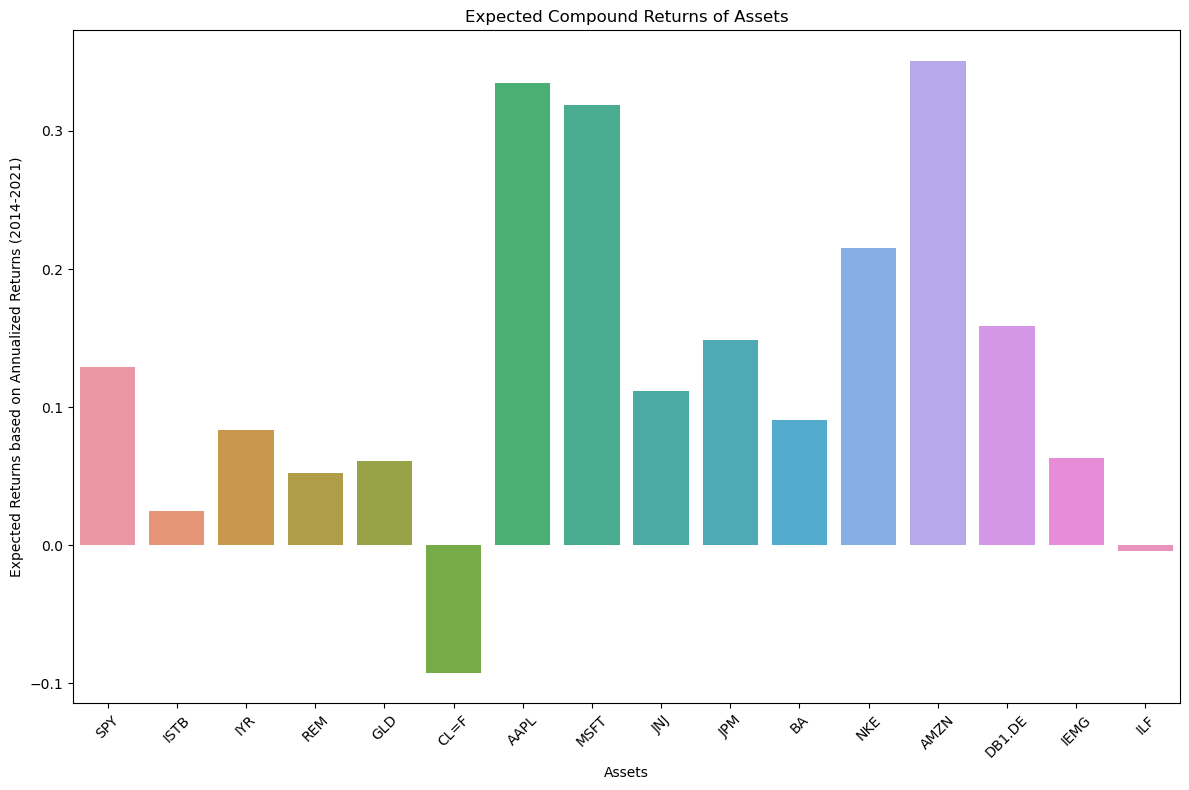

In [11]:
# Create the bar plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x=df.columns, y=exp_returns)
plt.xlabel('Assets')
plt.ylabel('Expected Returns based on Annualized Returns (2014-2021)')
plt.title('Expected Compound Returns of Assets')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


## Optimization Methods

### 1. Mean Variance Optimization (Markowitz Portfolio Theory) 

Mean Variance Optimization (MVO), also known as Modern Portfolio Theory (MPT), is a practical method for selecting investments to maximize their overall returns within an acceptable level of risk.

Such an objective leads to the construction of the "efficient frontier", which is a graph representing the highest return of a selected portfolio for a given risk. Based on it, investors can evaluate their risk tolerance and make rational investment decisions.

One intuitive approach to program the problem is to define an objective function that minimizes risk given any level of returns. Variance of a portfolio can serve as a measure for risk, therefore, we can work on minimizing it.

Mathematically, Mean Variance Optimization can be formulated as follows:

$$
\min_{\mathbf{w}} \left( \mathbf{w}^T \Sigma \mathbf{w} \right)
$$

subject to the constraint:

$$
\mathbf{w}^T \mu = \mu_p
$$

where:

- $\mathbf{w}$ is the vector of portfolio weights,
- $\Sigma$ is the covariance matrix of asset returns,
- $\mu$ is the vector of expected returns,
- $\mu_p$ is the target expected portfolio return.

This optimization problem aims to minimize the portfolio's variance (risk) subject to achieving the target expected return $\mu_p$.

In [12]:
def minimize_vol(target_return, er, cov):
    """
    Returns the optimal weights that achieve the target return
    given a set of expected returns and a covariance matrix
    """
    n = er.shape[0] #number of assets
    init_guess = np.repeat(1/n, n) #equally weighted portfolio as an initial guess for the optimizer
    bounds = ((0.0, 1.0),) * n #a set of 0% to 100% weight bounds for each asset

    #constraint: weights sum up to 1
    weights_sum_to_1 = {'type': 'eq',
                        'fun': lambda weights: np.sum(weights) - 1}
    #constraint: return is equal to the target return
    return_is_target = {'type': 'eq',
                        'args': (er,),
                        'fun': lambda weights, er: target_return - portfolio_return(weights,er)}
    #minimize the volatility of the portfolio given the constraints
    weights = minimize(portfolio_vol, init_guess,
                       args=(cov,), method='SLSQP',
                       options={'disp': False},
                       constraints=(weights_sum_to_1,return_is_target), 
                       bounds=bounds)
    return weights.x 


def optimal_weights(n_points, er, cov):
    """
    Calculates optimal porfolio weights for n points between maximum and minimum possible return
    """
    #Get a linear space of returns between 0 and maximum return
    target_rs = np.linspace(0, er.max(), n_points)
    #Get optimal weights for each of n_points returns
    weights = [minimize_vol(target_return, er, cov) for target_return in target_rs]
    return weights


For our specific application, the Mean-Variance Optimization (MVO) model can be used as follows:

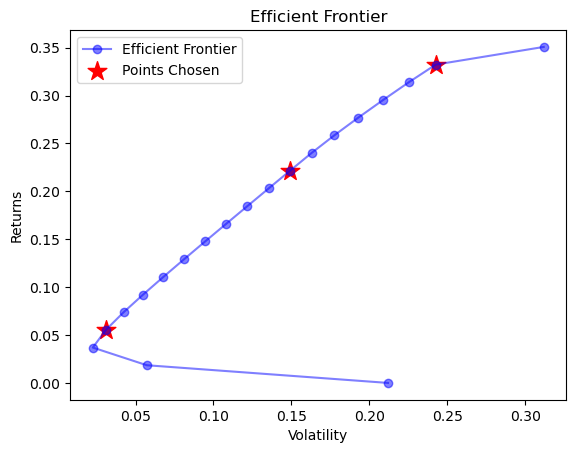

In [13]:
weights = optimal_weights(20, exp_returns, cov) #get optimal weights for 20 points as target return
rets = [portfolio_return(w, exp_returns) for w in weights] #calculate returns for each set of optimal weights
vols = [portfolio_vol(w, cov) for w in weights] #calculate volatility for each set of optimal weights
ef = pd.DataFrame({"Returns": rets, "Volatility": vols}) 

plt.plot(ef["Volatility"], ef["Returns"], marker='o', color='b', alpha=0.5)  
plt.scatter(ef['Volatility'][3], ef['Returns'][3], color='r', marker='*', s=200) #highlighting the 3 random sample points chosen by investors
plt.scatter(ef['Volatility'][12], ef['Returns'][12], color='r', marker='*', s=200) 
plt.scatter(ef['Volatility'][18], ef['Returns'][18], color='r', marker='*', s=200)
plt.xlabel("Volatility")
plt.ylabel("Returns")
plt.title("Efficient Frontier")
plt.legend(["Efficient Frontier", "Points Chosen"])
plt.show()


Given above is the efficient frontier of the portfolio. The red stars represent the 3 random sample points we selected as optimal points for investment. As known, returns and volatilites on the graph are based on the expected returns, so the next step would be the backtest of our optimal portfolio selection on the test data.

In [14]:
# store the weights of the 3 random sample points chosen by investors, which will be backtested later with other strategies
EF_1 = weights[3]
EF_2 = weights[12]
EF_3 = weights[18]

### 2. Maximum Sharpe Ratio

The Sharpe Ratio is a widely used measure of the risk-adjusted return of an investment. It calculates the excess return of an investment (above the risk-free rate) per unit of volatility (or risk).

The formula for the Sharpe Ratio is:

$$
\text{Sharpe Ratio} = \frac{R_p - R_f}{\sigma_p}
$$

where:
- $R_p$ is the expected portfolio return,
- $R_f$ is the risk-free rate,
- $\sigma_p$ is the standard deviation (volatility) of the portfolio's returns.

The Maximum Sharpe Portfolio seeks to maximize the Sharpe Ratio, indicating the portfolio with the highest risk-adjusted return. Mathematically, it can be formulated as follows:

$$
\max_{\mathbf{w}} \left( \frac{\mathbf{w}^T \mathbf{\mu} - R_f}{\sqrt{\mathbf{w}^T \Sigma \mathbf{w}}} \right)
$$

subject to the constraint:

$$
\mathbf{w}^T \mathbf{1} = 1
$$

where:
- $\mathbf{w}$ is the vector of portfolio weights,
- $\mathbf{\mu}$ is the vector of expected returns,
- $\Sigma$ is the covariance matrix of asset returns,
- $R_f$ is the risk-free rate,
- $\mathbf{1}$ is a vector of ones (ensuring the weights sum up to 1).

This optimization problem aims to maximize the Sharpe Ratio, indicating the portfolio with the highest risk-adjusted return.


In [15]:
def max_sharpe_portfolio(er, cov, risk_free_rate):
    """
    Returns the weights of the portfolio that gives the maximum Sharpe ratio
    """
    n = er.shape[0] #number of assets
    init_guess = np.repeat(1/n, n) #equally weighted portfolio as an initial guess for the optimizer
    bounds = ((0.0, 1.0),) * n  #a set of 0% to 100% weight bounds for each asset
    
    #constraint: weights sum up to 1
    weights_sum_to_1 = {'type': 'eq',
                        'fun': lambda weights: np.sum(weights) - 1}

    #function to minimize the negative of the Sharpe ratio, leading to the maximum Sharpe ratio
    def neg_sharpe_ratio(weights, er, cov, risk_free_rate):
        """
        Returns the negative of the Sharpe ratio given weights
        """
        r = portfolio_return(weights, er)
        vol = portfolio_vol(weights, cov)
        return -(r - risk_free_rate)/vol
 
    #minimize the negative of the Sharpe ratio
    weights = minimize(neg_sharpe_ratio, init_guess,
                       args=(er, cov, risk_free_rate), method='SLSQP',
                       options={'disp': False},
                       constraints=(weights_sum_to_1,),
                       bounds=bounds)
    return weights.x

In [16]:
# download risk-free rate data: 10-year Treasury constant maturity rate
# respective data transformation and cleaning
rf = pd.read_csv('DGS10.csv')
rf['DATE'] = pd.to_datetime(rf['DATE'])
rf.set_index('DATE', inplace=True)
rf['DGS10'] = pd.to_numeric(rf['DGS10'], errors='coerce')
rf = rf/100
rf.dropna(inplace=True)
rf = rf.resample('Y').last() #resample the data to annual frequency
rf_train = rf['2014':'2020']
rf_test = rf['2021':'2024']

rf_train = annualize_rets(rf_train, 1) #annualize the risk-free rate
rf_test = annualize_rets(rf_test, 1) 

In [17]:
weights_max_sharpe = max_sharpe_portfolio(exp_returns, cov, rf_train) #get the weights of the portfolio that gives the maximum Sharpe ratio

### 3. Global Minimum Variance Portfolio

Unlike the previously discussed methods, the Global Minimum Variance (GMV) approach does not require us to have explicit expected returns for the assets. This makes it particularly useful when expected returns are difficult to forecast accurately.

The GMV portfolio aims to allocate weights to assets in a way that minimizes the overall risk of the portfolio. It seeks to construct a portfolio that achieves the lowest possible variance (or standard deviation) of returns, regardless of the expected returns of individual assets.

Mathematically, the Global Minimum Variance Portfolio can be formulated as follows:

$$
\min_{\mathbf{w}} \left( \mathbf{w}^T \Sigma \mathbf{w} \right)
$$

subject to the constraint:

$$
\mathbf{w}^T \mathbf{1} = 1
$$

where:
- $\mathbf{w}$ is the vector of portfolio weights,
- $\Sigma$ is the covariance matrix of asset returns,
- $\mathbf{1}$ is a vector of ones (ensuring the weights sum up to 1).



In [18]:
def GMV(cov):
    """
    Returns the weights of the Global Minimum Volatility portfolio
    given a covariance matrix
    """
    n = cov.shape[0]
    #use the max_sharpe_portfolio function with equal weights and 0 risk-free rate to get the GMV portfolio
    #if we set all expected returns as equal to each other, the max_sharpe_portfolio function will minimize Sharpe Ratio's denominator, which is the volatility
    return max_sharpe_portfolio(np.repeat(1, n), cov, 0.0) 

In [19]:
weights_GMV = GMV(cov) #get the weights of the Global Minimum Volatility portfolio

### 4. Risk Parity Portfolio

The Risk Parity Portfolio is an approach to portfolio construction that aims to equalize the risk contributions of each asset within the portfolio. This method focuses on balancing the risk exposure rather than the expected returns. It is particularly useful in ensuring that no single asset disproportionately affects the overall risk profile of the portfolio.

Again, just like GMV, this approach does not require us expected returns, relying solely on a covariance matrix, estimated by historical returns. Risk Parity is a well-renowned method which is widely used in investment management, especially for balancing risk across asset classes.

Mathematically, the Risk Parity Portfolio can be formulated as follows:

1. **Determine the Risk Contribution of Each Asset:**

   The risk contribution of an asset to the portfolio can be expressed as:

   $$
   \text{RC}_i = w_i \cdot \left(\frac{\partial \text{Portfolio Risk}}{\partial w_i}\right)
   $$

   where:
   - $\text{RC}_i$ is the risk contribution of asset $i$,
   - $w_i$ is the weight of asset $i$ in the portfolio,
   - $\frac{\partial \text{Portfolio Risk}}{\partial w_i}$ is the partial derivative of the portfolio risk with respect to the weight of asset $i$.

2. **Formulate the Optimization Problem:**

   To achieve equal risk contribution, we set up the following optimization problem:

   $$
   \min_{\mathbf{w}} \sum_{i=1}^n \left(\text{RC}_i - \frac{1}{n} \text{Portfolio Risk}\right)^2
   $$

   subject to the constraint:

   $$
   \mathbf{w}^T \mathbf{1} = 1
   $$

   where:
   - $\mathbf{w}$ is the vector of portfolio weights,
   - $n$ is the number of assets in the portfolio,
   - $\mathbf{1}$ is a vector of ones (ensuring the weights sum up to 1).

   **Target Vector Computation:**

   The target for each asset's risk contribution is set to be equal. Since the total risk of the portfolio should be distributed equally among all assets, the target risk contribution for each asset is:

   $$
   \frac{1}{n} \times \text{Portfolio Risk}
   $$

In this formulation, the objective is to minimize the squared differences between each asset's risk contribution and this target, thereby ensuring that each asset contributes equally to the total risk of the portfolio.

As noted, usually, Risk Parity method is used to balance risks across asset classes within a portfolio rather than individual assets, however, for our use case, we are sticking with applying the optimization towards single assets.

In [20]:
def portfolio_vol(weights, cov):
    """ Calculates the portfolio volatility """
    return np.sqrt(np.dot(weights.T, np.dot(cov, weights)))

def rel_risk_contribution(weights, cov):
    """ Calculates the relative risk contribution of each asset in the portfolio """
    portfolio_vola = portfolio_vol(weights, cov)  # Portfolio volatility
    mvol = np.dot(cov, weights) / portfolio_vola  # Marginal volatility of each asset
    rc = np.multiply(weights, mvol)  # Risk contribution of each asset
    rrc = rc / rc.sum()  # Relative risk contribution of each asset
    return rrc

def mse_rrc(weights, target, cov):
    """ Calculates the mean squared error of the relative risk contribution """
    rrc = rel_risk_contribution(weights, cov)
    mse = ((rrc - target) ** 2).mean()
    return mse * 100

def risk_parity(cov):
    """
    Returns the weights of the Risk Parity portfolio
    given a covariance matrix
    """
    n = cov.shape[0]
    
    # Calculate the average risk contribution target as portfolio_vol / n
    init_guess = np.repeat(1/n, n)  # Equally weighted portfolio as an initial guess for the optimizer
    bounds = ((0.0, 1.0),) * n  # Set of 0% to 100% weight bounds for each asset
    
    # Constraint: weights sum up to 1
    weights_sum_to_1 = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}
    
    # Define a function to calculate the target risk contribution based on initial weights
    def compute_target(weights, cov):
        portfolio_vola = portfolio_vol(weights, cov)  # Portfolio volatility
        return np.full(n, portfolio_vola / n)  # Target risk contribution for each asset as average risk contribution

    # Initial calculation to determine the average risk contribution target
    initial_weights = init_guess
    target = compute_target(initial_weights, cov)  # Set target to portfolio_vol / n for all assets
    
    # Minimize the mean squared error of the relative risk contribution and target risk
    weights = minimize(mse_rrc, init_guess, args=(target, cov), method='SLSQP', bounds=bounds, constraints=weights_sum_to_1)
    
    return weights.x


In [21]:
weights_RP = risk_parity(cov) #get the weights of the Risk Parity portfolio

To showcase what the Risk Parity Portfolio is really doing, below is a bar chart which showcases risk contribution of each asset in the portfolio. The Risk Parity Portfolio aims to equalize the risk contribution of each asset in the portfolio.

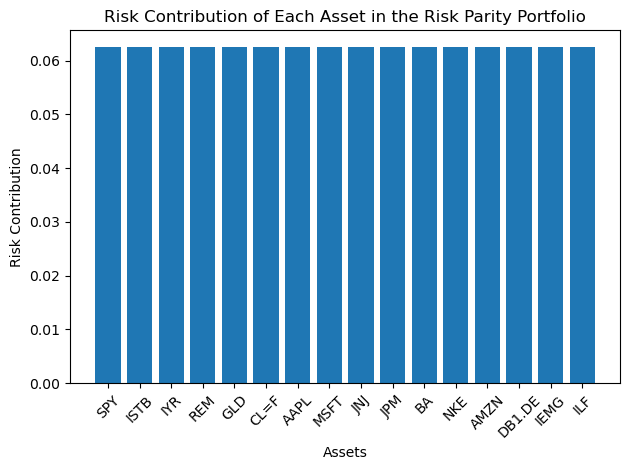

In [22]:
# plot the risk contribution of each asset in the risk parity portfolio
plt.bar(df.columns, rel_risk_contribution(weights_RP, cov))
plt.xlabel('Assets')
plt.ylabel('Risk Contribution')
plt.title('Risk Contribution of Each Asset in the Risk Parity Portfolio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

As expected, each asset, when multiplied by its weight in the portfolio, contributes equally to the portfolio's risk, which is the main objective of the Risk Parity strategy.

### 5. Equal Weights Portfolio (Benchmark)

The Equally Weighted Portfolio involves no algorithm and simply assigns an equal weight to all assets in the portfolio.

This approach is often used as a benchmark to compare the performance of more sophisticated portfolio optimization models.

Mathematically, the Equally Weighted Portfolio can be represented as follows:

$$
\mathbf{w} = \left( \frac{1}{n}, \frac{1}{n}, \ldots, \frac{1}{n} \right)
$$

where:
- $\mathbf{w}$ is the vector of portfolio weights,
- $n$ is the total number of assets in the portfolio.


In [23]:
def equal_weights(n):
    """
    Returns the weights of an equally weighted portfolio
    given the number of assets
    """
    return np.repeat(1/n, n)

weights_equal = equal_weights(len(tickers))

## Performance Assessment and Backtesting

To assess the performance of our optimized investment portfolios, we backtest them on the test data from 2021 to 2024 while computing various financial metrics for comparative analysis.

In [24]:
# calculating returns of chosen portfolios with weights for the test data
returns = pd.DataFrame()
returns['EF_1'] = df_test @ EF_1
returns['EF_2'] = df_test @ EF_2
returns['EF_3'] = df_test @ EF_3
returns['Max_Sharpe'] = df_test @ weights_max_sharpe
returns['GMV'] = df_test @ weights_GMV
returns['Equal_Weights'] = df_test @ weights_equal
returns['Risk_Parity'] = df_test @ weights_RP
returns['SPY'] = df_test['SPY']

In [25]:
#calculate cumulative returns for each portfolio
cumulative_returns = (1+returns).cumprod()-1

# Create traces for each stock's cumulative returns
traces = []
for column in cumulative_returns.columns:
    trace = go.Scatter(
        x=cumulative_returns.index,
        y=cumulative_returns[column],
        mode='lines',
        name=column
    )
    traces.append(trace)

# Create layout
layout = go.Layout(
    title='Cumulative Returns of Portfolios',
    xaxis=dict(title='Date', tickformat='%Y-%m-%d', showgrid=True),
    yaxis=dict(title='Cumulative Return', showgrid=True),
    template='plotly_dark',  # You can choose a different template if needed
    width=1200,  # Width of the plot
    height=600,  # Height of the plot
    font=dict(family='Arial, sans-serif', size=12, color='white'),  # Font settings
    legend=dict(font=dict(color='white'))  # Legend font color
)

# Create figure
fig = go.Figure(data=traces, layout=layout)

# Show plot
fig.show()


As to cumulative returns over the backtest period (2021 - 2024), we see that the weights referring to the highest attainable return point from the efficient frontier performed the best, achieving a 38.6% return over three years, or an annualized return of 11%.

The backtest period encompasses the bullish market following COVID-19, hence, the strong performance of the Efficient Frontier Portfolio can be attributed to favorable market conditions and the economic recovery.

In contrast, the S&P 500 comes in second overall in terms of cumulative returns, with a 33.3% return over three years, or around 10% annualized. This strong performance of the market benchmark also reflects the favorable investment horizon, supported by monetary policies that stimulated growth as well as a broad economic recovery.

High returns are not always the best indicator of a good investment. It is important to consider risks associated with an investment. Therefore, we also compare Sharpe ratios, a measure of a risk-adjusted return, across our portfolios.

In [26]:
volatilities_annual = returns.std()*np.sqrt(252)
returns_annual = annualize_rets(returns, 252)
rf_test = np.repeat(rf_test, len(returns_annual))

In [27]:
sharpe_ratios = pd.DataFrame()
sharpe_ratios['rf_test'] = rf_test.values  # Risk-free rate
sharpe_ratios['returns_annual'] = returns_annual.values
sharpe_ratios['volatilities_annual'] = volatilities_annual.values
sharpe_ratios.set_index(returns_annual.index, inplace=True)
sharpe_ratios

rf_test  returns_annual  volatilities_annual
EF_1           0.030873        0.008898             0.043312
EF_2           0.030873        0.088892             0.166669
EF_3           0.030873        0.113910             0.269107
Max_Sharpe     0.030873        0.093429             0.175288
GMV            0.030873       -0.003871             0.030686
Equal_Weights  0.030873        0.080090             0.149058
Risk_Parity    0.030873        0.029784             0.068493
SPY            0.030873        0.099873             0.176039

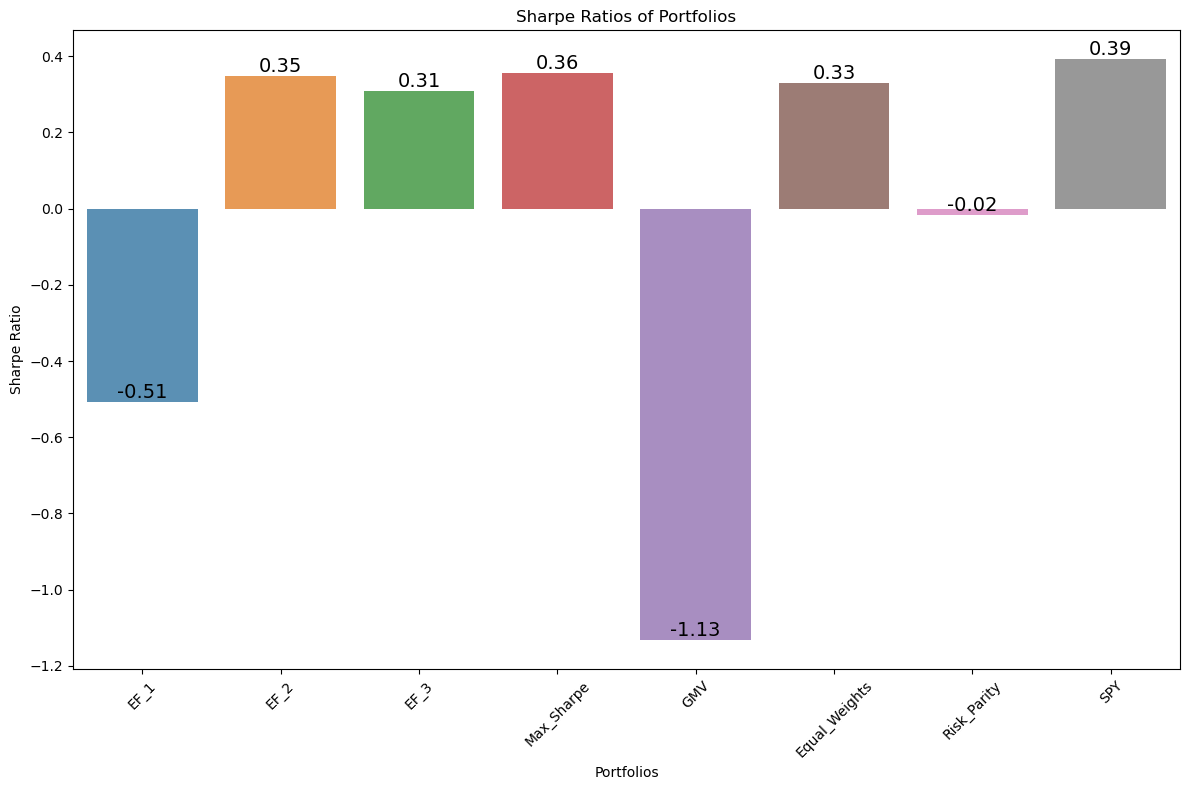

In [28]:
sharpe_ratios['Sharpe_Ratio'] = (sharpe_ratios['returns_annual'] - sharpe_ratios['rf_test'])/sharpe_ratios['volatilities_annual']
plt.figure(figsize=(12, 8))
sns.barplot(x=sharpe_ratios.index, y=sharpe_ratios['Sharpe_Ratio'], alpha=0.8)

# Add text annotations for each bar
for index, value in enumerate(sharpe_ratios['Sharpe_Ratio']):
    plt.text(index, value, round(value, 2), ha='center', va='bottom', fontsize=14)

plt.xlabel('Portfolios')
plt.ylabel('Sharpe Ratio')
plt.title('Sharpe Ratios of Portfolios')
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()

As to Sharpe ratios, we see that the S&P 500 has the highest value of 0.39 surpassing Maximum Sharpe and 2nd point from the Efficient Frontier by only a few points.

On the other hand, our most successful portfolio in terms of cumulative returns EF_3 has a Sharpe ratio of 0.31, which is lower than the above mentioned three. This again, means that higher rewards come with greater risk and returns are not the only assessment metrics for investments.

Furthermore, we cannot ignore the strong performance of the Equal Weights portfolio, which just assigns equal weights to all assets within a portfolio. This again speaks about favorable market conditions, stimulating growth across assets over the backtest period.

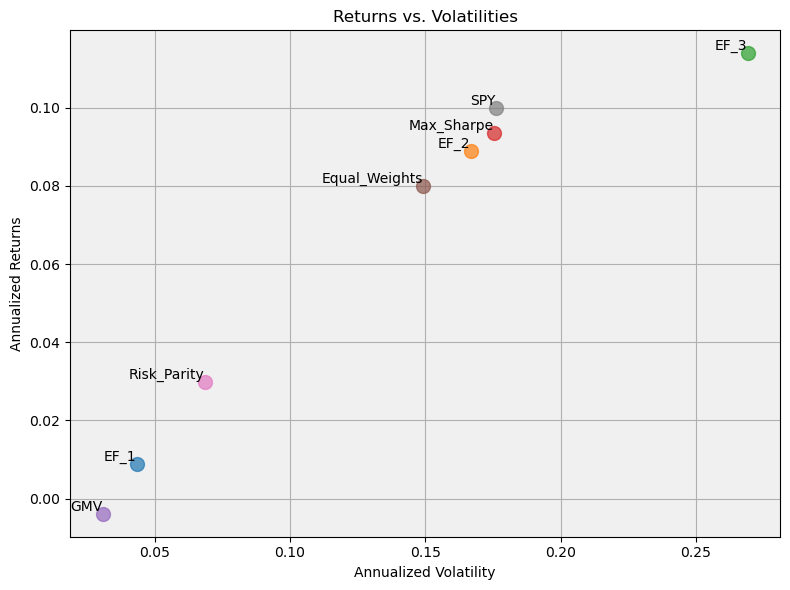

In [29]:
# Plot returns against volatilities with enhanced appearance
plt.figure(figsize=(8, 6))

# Plot each point with customized appearance
for i in range(len(volatilities_annual)):
    plt.scatter(volatilities_annual[i], returns_annual[i], label=volatilities_annual.index[i], s=100, alpha=0.7, zorder=2)
    plt.text(volatilities_annual[i], returns_annual[i], volatilities_annual.index[i], fontsize=10, ha='right', va='bottom')

plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Returns')
plt.title('Returns vs. Volatilities')

# Add grid lines
plt.grid(True, zorder=1)

# Customize plot background
plt.gca().set_facecolor('#f0f0f0')

plt.tight_layout()
plt.show()

Based on the above plot, which portrays volatilites of our portfolios against returns, we can notice that there is almost perfect positive linear relationship between risk and returns. This again proves the point that higher returns require risks.

The S&P 500 index and Equal Weights Portfolios are both commonly used as benchmarks for comparative analysis of portfolio performance. While one of our portfolios was able to outperform the market index in terms of returns, the S&P 500 had the highest Sharpe Ratio. This underscores the hypothesis of Efficient Markets: beating the market consistently is indeed a challenging task.

Quantitative approaches to portfolio selection, such as those we've explored, offer significant benefits but should not be used in isolation for decision-making. To achieve optimal results, these approaches should be complemented with qualitative and market analysis, stock picking, and more sophisticated methods for approximating future returns.

In [30]:
# Plot each column with SPY as benchmark
for column in cumulative_returns.columns:
    if column != 'SPY' and column != 'Equal_Weights': 
        fig = go.Figure()

        # Add the column and SPY with Equal Weights to the plot
        fig.add_trace(go.Scatter(x=cumulative_returns.index, y=cumulative_returns[column], mode='lines', name=column))
        fig.add_trace(go.Scatter(x=cumulative_returns.index, y=cumulative_returns['SPY'], mode='lines', name='SPY (Benchmark)'))
        fig.add_trace(go.Scatter(x=cumulative_returns.index, y=cumulative_returns['Equal_Weights'], mode='lines', name='Equal Weights'))

        # Set layout
        fig.update_layout(
            title=f'{column} vs SPY vs Equal Weights',
            xaxis_title='Date',
            yaxis_title='Return',
            width=1200,  # Adjust width
            height=600,  # Adjust height
          # Light mode
        )

        # Show plot
        fig.show()

From the figures above, where each portfolio is plotted alongside benchmarks such as the Equal Weights portfolio and the S&P 500, we see that our portfolios are struggling to outperform them. While the portfolio optimization techniques we tested are data-driven and free from bias or emotion, it is crucial to integrate them with proper qualitative and market analysis, stock picking, and more robust methods for estimating expected returns. The true power of these optimization methods can only be fully harnessed when used in conjunction with these additional strategies.


### Conclusion
In conclusion, while portfolio optimization offers a structured and analytical approach to asset allocation, its effectiveness is limited when applied in isolation. The financial markets are influenced by a myriad of factors, many of which are difficult to capture through quantitative models alone. To achieve consistent outperformance, it is essential to complement optimization techniques with comprehensive market research, qualitative insights, and advanced forecasting methods. By combining these approaches, investors can better navigate the complexities of the market and enhance the potential for superior returns.